In [43]:
import pandas as pd
import yfinance as yf
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
kode =yf.download(['BBCA.JK','BYAN.JK','TLKM.JK','ASII.JK'],start = '2023-01-01',end = '2023-12-31')
print(kode)

[*********************100%***********************]  4 of 4 completed
              Adj Close                                           Close  \
                ASII.JK      BBCA.JK       BYAN.JK      TLKM.JK ASII.JK   
Date                                                                      
2023-01-02  5138.664551  8154.729004  20636.699219  3646.536133  5700.0   
2023-01-03  5093.588379  8154.729004  20685.255859  3704.113037  5650.0   
2023-01-04  5116.126465  7963.975098  20515.306641  3665.728271  5675.0   
2023-01-05  4845.670410  7868.598145  19398.496094  3617.747559  5375.0   
2023-01-06  4913.284668  7916.286621  19981.179688  3560.170654  5450.0   
...                 ...          ...           ...          ...     ...   
2023-12-21  5550.000000  9114.956055  19525.000000  3950.000000  5550.0   
2023-12-22  5550.000000  9114.956055  19500.000000  3960.000000  5550.0   
2023-12-27  5550.000000  9163.830078  19300.000000  3940.000000  5550.0   
2023-12-28  5600.000000  9188.2

In [29]:
big_cap = {'ASII':kode[('Close', 'ASII.JK')],'BBCA':kode[('Close', 'BBCA.JK')],'BYAN':kode[('Close', 'BYAN.JK')],'TLKM':kode[('Close', 'TLKM.JK')]}

In [30]:
data_bigcap_2023=pd.DataFrame(big_cap)

In [31]:
data_bigcap_2023.reset_index(inplace=True)
data_bigcap_2023

,Date,ASII,BBCA,BYAN,TLKM
0,2023-01-02,5700.0,8550.0,21250.0,3800.0
1,2023-01-03,5650.0,8550.0,21300.0,3860.0
2,2023-01-04,5675.0,8350.0,21125.0,3820.0
3,2023-01-05,5375.0,8250.0,19975.0,3770.0
4,2023-01-06,5450.0,8300.0,20575.0,3710.0
...,...,...,...,...,...
234,2023-12-21,5550.0,9325.0,19525.0,3950.0
235,2023-12-22,5550.0,9325.0,19500.0,3960.0
236,2023-12-27,5550.0,9375.0,19300.0,3940.0
237,2023-12-28,5600.0,9400.0,19825.0,3960.0


In [7]:
ihsg = pd.read_csv('^JKSE.csv')

In [8]:
IHSG = ihsg[ihsg['Date']>='2023-01-01']['Close']
ihsg_list = IHSG.to_list()

In [32]:
data_bigcap_2023['IHSG']=ihsg_list

In [41]:
data_bigcap_2023
data_copy = data_bigcap_2023.copy()

In [35]:
data_nodate = data_bigcap_2023.loc[:,'ASII':]

In [36]:
for i in data_nodate.columns:
        data_nodate[i]=pd.DataFrame(data_nodate[i].pct_change()*100)

In [37]:
data_nodate

,ASII,BBCA,BYAN,TLKM,IHSG
0,NaN,NaN,NaN,NaN,NaN
1,-0.877193,0.000000,0.235294,1.578947,0.551365
2,0.442478,-2.339181,-0.821596,-1.036269,-1.096265
3,-5.286344,-1.197605,-5.443787,-1.308901,-2.339533
4,1.395349,0.606061,3.003755,-1.591512,0.461647
...,...,...,...,...,...
234,-1.333333,0.268817,0.256739,-0.252525,-0.139173
235,0.000000,0.000000,-0.128041,0.253165,0.386982
236,0.000000,0.536193,-1.025641,-0.505051,0.116020
237,0.900901,0.266667,2.720207,0.507614,0.800067


## Visualisasi

In [42]:
data_copy

,Date,ASII,BBCA,BYAN,TLKM,IHSG
0,2023-01-02,5700.0,8550.0,21250.0,3800.0,6850.983887
1,2023-01-03,5650.0,8550.0,21300.0,3860.0,6888.757813
2,2023-01-04,5675.0,8350.0,21125.0,3820.0,6813.238770
3,2023-01-05,5375.0,8250.0,19975.0,3770.0,6653.840820
4,2023-01-06,5450.0,8300.0,20575.0,3710.0,6684.558105
...,...,...,...,...,...,...
234,2023-12-21,5550.0,9325.0,19525.0,3950.0,7209.619141
235,2023-12-22,5550.0,9325.0,19500.0,3960.0,7237.519043
236,2023-12-27,5550.0,9375.0,19300.0,3940.0,7245.916016
237,2023-12-28,5600.0,9400.0,19825.0,3960.0,7303.888184


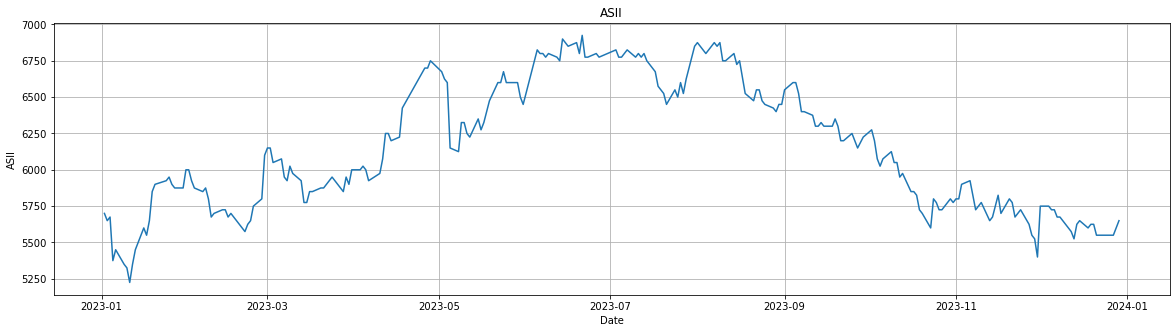

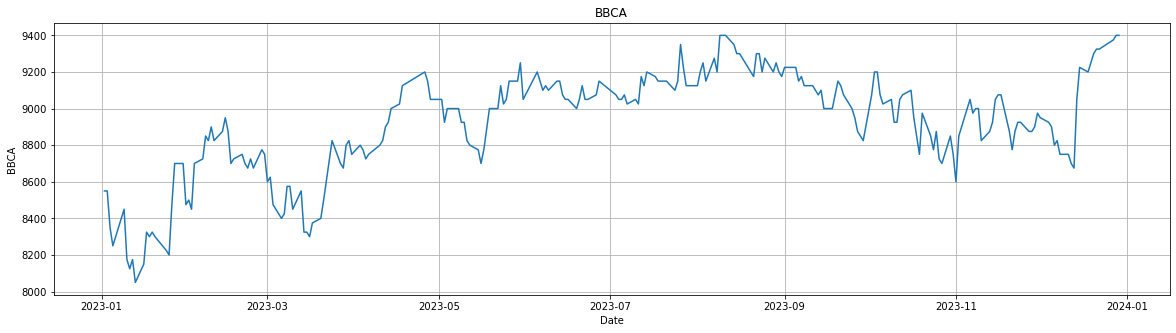

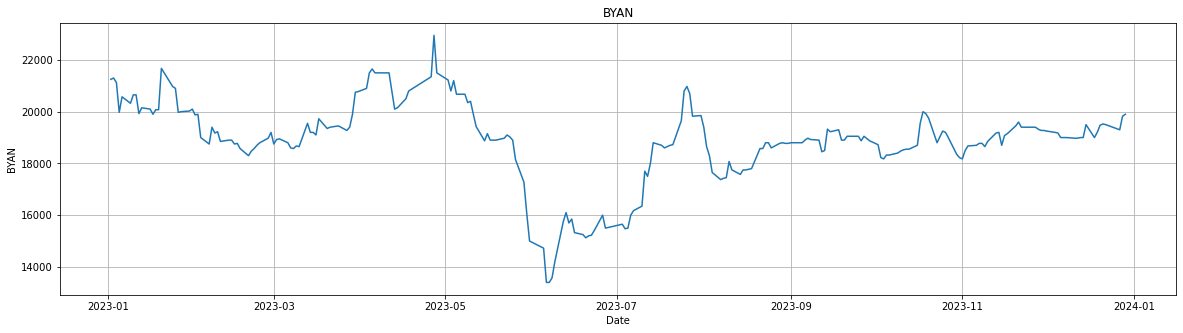

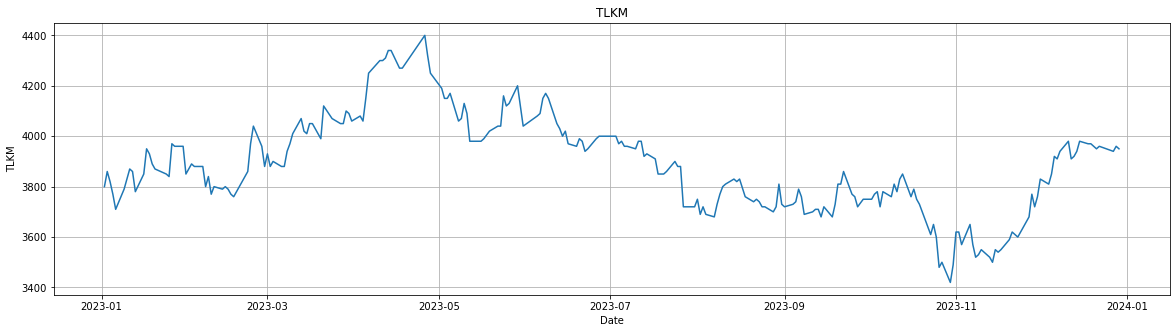

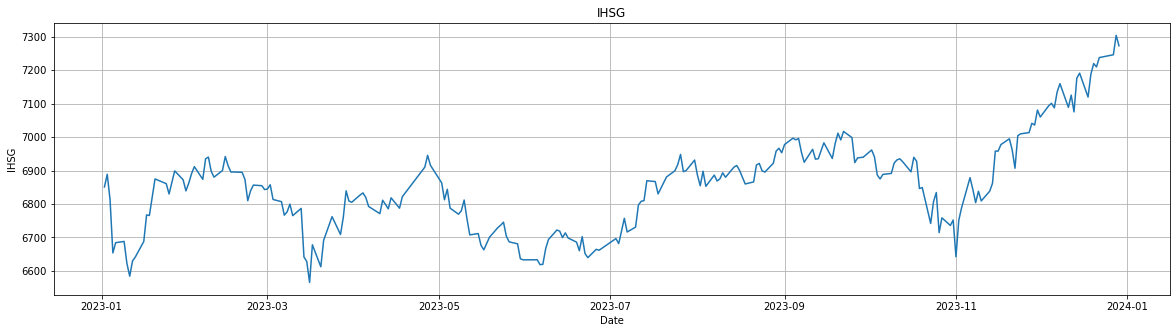

In [50]:
for kolom in data_bigcap_2023.columns:
    if kolom != 'Date':
        plt.figure(figsize=(20,5))
        plt.grid()
        sns.lineplot(data=data_copy,x='Date',y=kolom )
        plt.title(kolom)
        plt.show()

In [77]:
ytd_results = {}

for column in data_bigcap_2023.columns:
    if column != 'Date':
        ytd_results[column] = ((data_copy[column].iloc[-1] - data_copy[column].iloc[0]) / data_copy[column].iloc[0]) * 100

# Printing the results
for column, ytd in ytd_results.items():
    print(f"{column}: {ytd: .2f}%")

ASII: -0.88%
BBCA:  9.94%
BYAN: -6.35%
TLKM:  3.95%
IHSG:  6.16%


In [69]:
for ytd in data_bigcap_2023.columns:
    ((data_copy[].loc[238:] - data_copy['ASII'].loc[:0].values)/data_copy['ASII'].loc[:0].values)*100

238   -0.877193
Name: ASII, dtype: float64

In [67]:
print(data_copy['ASII'].loc[:0] )
print(data_copy['ASII'].loc[238:])

0    5700.0
Name: ASII, dtype: float64
238    5650.0
Name: ASII, dtype: float64
